# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_up.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb_up = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (55,25)
Number of data: 1375.0
dx: 222.2 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_multi['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -20.0 degree
Main field declination: -20.0 degree


### Magnetization direction

In [15]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -45.0 degree
Declination: 50.0 degree


In [16]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [17]:
h = 0.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1250

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 5*1e-4
eps_i = 5*1e-4

In [25]:
mu_list = [0.,1.,1e3,1e4,1e5,1e6]

In [26]:
delta_z = -400
z_up = airborne['z'] + delta_z

In [27]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_up_400'],airborne['x'],airborne['y'],z_up,
        xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],z_up,
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_up_400'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-18.4923550484 -12.6597353348
0.0992277771773
i = 1
-25.794325162 -14.0179506578
0.10153926082
i = 2
-31.878147915 -15.006003908
0.09339531667
i = 3
-37.0166020175 -15.6729106025
0.0853213785252
i = 4
-41.3391211452 -15.9716371745
0.0756529612653
i = 5
-44.9464166451 -15.9394661652
0.0644038941407
i = 6
-47.933313275 -15.6033277141
0.0525443344822
i = 7
-50.4050150648 -14.9292073447
0.0421253687025
i = 8
-52.4627617485 -13.9151918699
0.0340680687732
i = 9
-54.178812338 -12.5930655253
0.0278925599036
i = 10
-55.6087874573 -11.0089909034
0.0232165107929
i = 11
-56.7988614052 -9.20715963496
0.0197851465738
i = 12
-57.7842624583 -7.21240329201
0.017380285635
i = 13
-58.590320335 -5.07144779605
0.0155396167644
i = 14
-59.2381316332 -2.82948427678
0.0140884261734
i = 15
-59.7423091576 -0.539326615124
0.0127634673891
i = 16
-60.1206246702 1.75736517494
0.0116186595585
i = 17
-60.3899262089 4.03961144611
0.0107262715689
i = 18
-60.563967572 6.28731338151
0.00999352647686
i = 19
-60.65572

-51.6416157555 43.1164852114
0.000884755691
i = 62
-51.472892841 43.3621912672
0.000860254946132
i = 63
-51.3066231907 43.6012041309
0.000836694775132
i = 64
-51.1426713231 43.8339578097
0.000814993222578
i = 65
-50.9809911305 44.060740051
0.000794195266869
i = 66
-50.8217062226 44.28251301
0.000775489604662
i = 67
-50.6648523834 44.5004530329
0.000759988914671
i = 68
-50.5103331185 44.714557456
0.000744743335798
i = 69
-50.357747821 44.9236752104
0.000727836992198
i = 70
-50.2070236435 45.1279765972
0.000711650957029
i = 71
-50.0579934222 45.3276262444
0.000696678983015
i = 72
-49.9104454965 45.5228753053
0.000683424252252
i = 73
-49.7643631981 45.7139201629
0.000670687306841
i = 74
-49.6197068679 45.9007823141
0.000658071890181
i = 75
-49.4764686411 46.0835686408
0.000645674888086
i = 76
-49.3344831424 46.2624875654
0.000634637219132
i = 77
-49.1936753615 46.4377075031
0.000624365832164
i = 78
-49.0540750495 46.6093485155
0.000614163950652
i = 79
-48.9157056768 46.7775295466
0.000604

-59.0698799346 25.4038896712
0.00419891281313
i = 30
-58.7969857699 26.5853089022
0.00392924792604
i = 31
-58.519266721 27.6931528382
0.00368641365711
i = 32
-58.2376010894 28.7342645191
0.00347514680088
i = 33
-57.954599711 29.7117449881
0.00326716999838
i = 34
-57.6716485536 30.6300663238
0.00307321902427
i = 35
-57.3901660734 31.4927474872
0.00288735229445
i = 36
-57.1119160419 32.3021166587
0.00270140700124
i = 37
-56.8377021445 33.0615152463
0.00252462555562
i = 38
-56.5672807704 33.7751227263
0.00236608502787
i = 39
-56.3016277929 34.4461658719
0.0022157375636
i = 40
-56.0408103376 35.0781683754
0.00207865879754
i = 41
-55.7846701464 35.6744780223
0.00195528407289
i = 42
-55.5334373389 36.2378745507
0.00184109173466
i = 43
-55.2876172757 36.770605196
0.00173236481566
i = 44
-55.0468716747 37.2758859619
0.00163719986176
i = 45
-54.8113722913 37.7557509983
0.00154806245471
i = 46
-54.5813673611 38.2116924778
0.00146239020248
i = 47
-54.3570604107 38.6449944079
0.00137967302806
i = 

## L-curve visualization

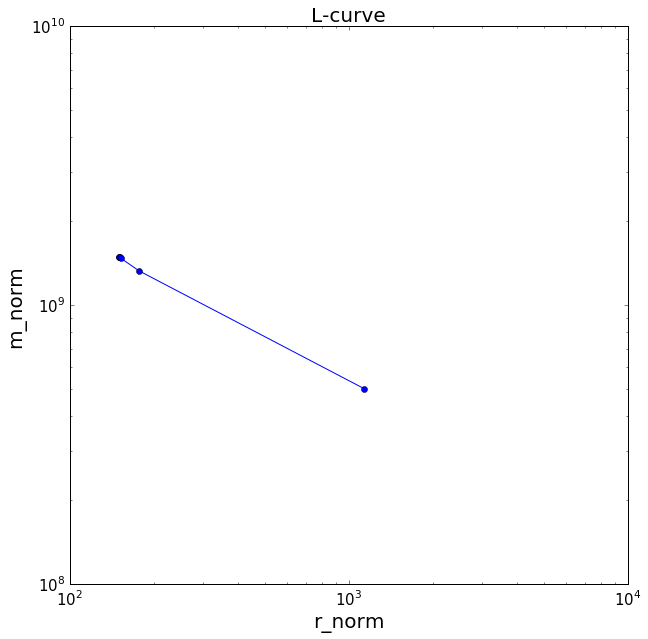

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [29]:
result_RM_airb_up['magnetic_moment'] = m_est
result_RM_airb_up['inc_est'] = incl_est
result_RM_airb_up['dec_est'] = decl_est
result_RM_airb_up['layer_depth'] = h
result_RM_airb_up['reg_parameter'] = mu_list
result_RM_airb_up['phi'] = phi_list

### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb_up['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/result_RM_airb_up.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb_up, f)
    
saved_files.append(file_name)

### Saved files

In [32]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb_up.pickle
